## Imports

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import regularizers
import pickle
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import scipy.sparse 

## Loading Data

### tf-idf Embeddings

In [2]:
tfidf_embeddings_train = scipy.sparse.load_npz('/home/sanjaycollege15/PredictingDiagnoses/Data/tfidf_embeddings_train_v2.npz')
tfidf_labels_train = np.load('/home/sanjaycollege15/PredictingDiagnoses/Data/tfidf_labels_train_v2.npy', allow_pickle = True)
tfidf_embeddings_test = scipy.sparse.load_npz('/home/sanjaycollege15/PredictingDiagnoses/Data/tfidf_embeddings_test_v2.npz')
tfidf_labels_test = np.load('/home/sanjaycollege15/PredictingDiagnoses/Data/tfidf_labels_test_v2.npy', allow_pickle = True)


In [5]:
tfidf_embeddings_train

<54544x4200 sparse matrix of type '<class 'numpy.float16'>'
	with 1372924 stored elements in Compressed Sparse Row format>

In [6]:
tfidf_embeddings_test

<13636x4200 sparse matrix of type '<class 'numpy.float16'>'
	with 343536 stored elements in Compressed Sparse Row format>

## Define Keras Model

In [32]:
inputs = tf.keras.layers.Input(shape=(tfidf_embeddings_train[0].shape[1],))
hidden_1_out = tf.keras.layers.Dense(2000, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(inputs)
dropout = tf.keras.layers.Dropout(0.2)(hidden_1_out)
hidden_2_out = tf.keras.layers.Dense(1000, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(dropout)
classification_out = tf.keras.layers.Dense(4, activation='softmax')(hidden_2_out)

model_functional = tf.keras.models.Model(inputs=inputs, outputs = classification_out)
model_functional.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])

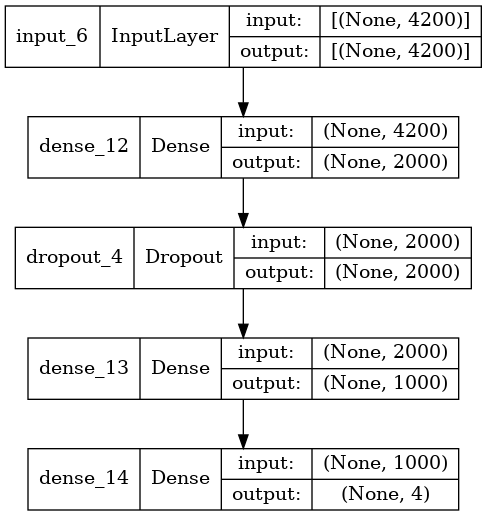

In [33]:
tf.keras.utils.plot_model(model_functional, "tf_idf_embeddings.png", show_shapes = True)


In [34]:
model_functional.fit(tfidf_embeddings_train, tfidf_labels_train, epochs=20, batch_size=512)


Epoch 1/20


/home/sanjaycollege15/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:448: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model_4/dense_12/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model_4/dense_12/embedding_lookup_sparse/Reshape:0", shape=(None, 2000), dtype=float32), dense_shape=Tensor("gradient_tape/model_4/dense_12/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


107/107 [==============================] - 16s 137ms/step - loss: 1.7355 - accuracy: 0.3564
Epoch 2/20
107/107 [==============================] - 15s 141ms/step - loss: 1.3637 - accuracy: 0.3798
Epoch 3/20
107/107 [==============================] - 15s 140ms/step - loss: 1.3488 - accuracy: 0.3823
Epoch 4/20
107/107 [==============================] - 15s 135ms/step - loss: 1.3383 - accuracy: 0.3909
Epoch 5/20
107/107 [==============================] - 15s 136ms/step - loss: 1.3314 - accuracy: 0.3944
Epoch 6/20
107/107 [==============================] - 15s 137ms/step - loss: 1.3269 - accuracy: 0.4007
Epoch 7/20
107/107 [==============================] - 15s 138ms/step - loss: 1.3175 - accuracy: 0.4070
Epoch 8/20
107/107 [==============================] - 15s 137ms/step - loss: 1.3119 - accuracy: 0.4152
Epoch 9/20
107/107 [==============================] - 15s 137ms/step - loss: 1.3070 - accuracy: 0.4202
Epoch 10/20
107/107 [==============================] - 15s 138ms/step - loss: 1.2965

In [35]:
model_functional.evaluate(tfidf_embeddings_test, tfidf_labels_test)


427/427 [==============================] - 14s 32ms/step - loss: 1.5243 - accuracy: 0.3646


[1.5243247747421265, 0.3646230697631836]

Some learning! Perhaps because the dataset is too homogenous. Not a lot of variation to indicate different categories since the categories often span multiple notes. 